# STEP 0: Đọc data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install nltk

##Ngoài những thư viện cần thiết chúng ta thường gặp bài này chúng ta sẽ sử dụng thêm các thư viện như :
- **seaborn** : được sử dụng cho việc tạo ra các biểu đồ và trực quan hóa dữ liệu
-**nltk**: để xử lý, phân tích và trích xuất thông tin từ dữ liệu văn bản trong Ngôn ngữ tự nhiên (NLP)
- dùng **transformer** để sử dụng các thư viện như **Autokenizer** để tách câu văn thành các từ riêng lẻ và lưu chúng
vào danh sách tokens

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [ ]:
#Read in data
df = pd.read_csv('/content/review_data.csv')
print(df.shape)
print(df.shape)

(3688, 8)
(3688, 8)


In [ ]:
df.head()

,Review,giai_tri,luu_tru,nha_hang,an_uong,di_chuyen,mua_sam,Score
0,"Bánh rất nhiều tôm to, tôm giòn nằm chễm chệ t...",0,0,0,5,0,0,5
1,Đi Quy Nhơn cứ lo không có pizza ăn nhưng nhờ ...,0,0,0,5,0,0,5
2,"các món ăn ở đây không có gì đặc sắc, có lẽ nấ...",0,0,1,1,0,0,2
3,"Lần thứ 2 quay lại đây, vì giới thiệu quán cà ...",0,0,0,2,0,0,2
4,Rất khuyên bạn nên ghé thăm quán bar thể thao này,3,0,0,0,0,0,3


In [ ]:
data = df[df['Score'] <= 5]
print(data.shape)

(3261, 8)


##  Natural Language Toolkit

In [ ]:
#Lấy ra dòng data thứ 100 tại cột Review
example = df['Review'][100]
print(example)

Tôi đã được đón bởi corp này và tài xế khăng khăng tôi đặt chiếc túi nhỏ của tôi trong cốp xe cùng với chiếc vali. 
Tôi đến khách sạn của mình và anh ấy đã thay đổi từ chối đưa cho tôi chiếc túi nhỏ của tôi và khẳng định tôi đã không đưa nó cho anh ấy. Anh ta từ chối mở cốp xe và để tôi nhìn, trở nên hiếu chiến, hung bạo và đe dọa tôi trước khi cướp tiền của tôi và lái xe đi.


In [ ]:
# tách câu văn thành các từ riêng lẻ và lưu chúng vào danh sách tokens
nltk.download('punkt')

tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Tôi', 'đã', 'được', 'đón', 'bởi', 'corp', 'này', 'và', 'tài', 'xế']

In [ ]:
#phân loại 15 từ đầu trong danh sách tokens và lư ukết quả vào danh sách tagged
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:15]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Tôi', 'NNP'),
 ('đã', 'NNP'),
 ('được', 'NNP'),
 ('đón', 'NNP'),
 ('bởi', 'NNP'),
 ('corp', 'NN'),
 ('này', 'NN'),
 ('và', 'NN'),
 ('tài', 'NN'),
 ('xế', 'NNP'),
 ('khăng', 'NNP'),
 ('khăng', 'NNP'),
 ('tôi', 'NN'),
 ('đặt', 'NNP'),
 ('chiếc', 'NN')]

In [ ]:
#phân tích cú pháp và xác định các thực thể trong danh sách
nltk.download('words')
nltk.download('maxent_ne_chunker')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (PERSON Tôi/NNP)
  đã/NNP
  được/NNP
  đón/NNP
  bởi/NNP
  corp/NN
  này/NN
  và/NN
  tài/NN
  xế/NNP
  khăng/NNP
  khăng/NNP
  tôi/NN
  đặt/NNP
  chiếc/NN
  túi/NN
  nhỏ/JJ
  của/NN
  tôi/NN
  trong/JJ
  cốp/NN
  xe/NNP
  cùng/NN
  với/NN
  chiếc/NN
  vali/NN
  ./.
  (PERSON Tôi/NNP)
  đến/NNP
  khách/NNP
  sạn/VBD
  của/JJ
  mình/NN
  và/NN
  anh/NN
  ấy/NNP
  đã/NNP
  thay/NN
  đổi/NNP
  từ/NN
  chối/NN
  đưa/NNP
  cho/NN
  tôi/NN
  chiếc/NN
  túi/NN
  nhỏ/JJ
  của/NN
  tôi/NN
  và/NN
  khẳng/NN
  định/NNP
  tôi/NN
  đã/NNP
  không/NNP
  đưa/NNP
  nó/MD
  cho/VB
  anh/JJ
  ấy/NNP
  ./.
  Anh/NNP
  ta/JJ
  từ/NN
  chối/NN
  mở/NN
  cốp/NN
  xe/NNP
  và/NN
  để/NNP
  tôi/NN
  nhìn/NN
  ,/,
  trở/JJ
  nên/NN
  hiếu/NN
  chiến/NN
  ,/,
  hung/NN
  bạo/NN
  và/NN
  đe/NNP
  dọa/NN
  tôi/NN
  trước/NN
  khi/NN
  cướp/NN
  tiền/NN
  của/NN
  tôi/NN
  và/NN
  lái/NN
  xe/NNP
  đi/NNP
  ./.)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


# Step 1: Roberta Pretrained Model

In [ ]:
!pip install transformers

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.11083592, 'roberta_neu': 0.85125583, 'roberta_pos': 0.037908312}


# Step 2: Đánh giá theo sao

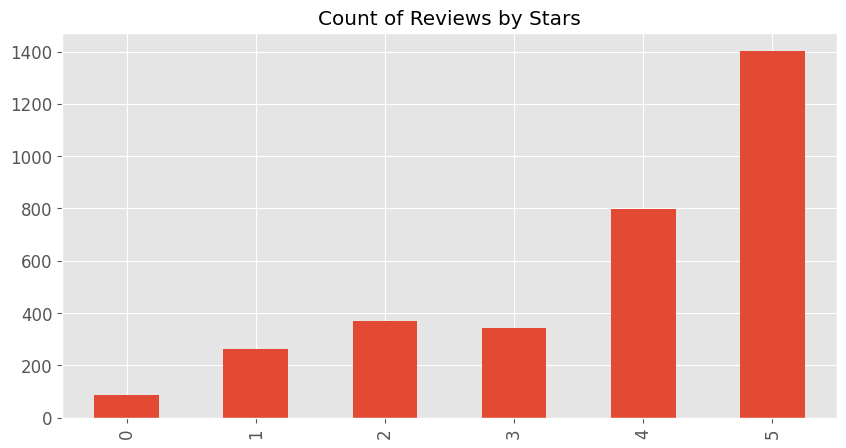

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('xtick', labelsize=12)  # Đặt kích thước của nhãn x
plt.rc('ytick', labelsize=12)  # Đặt kích thước của nhãn y

data['Score'].value_counts().sort_index() \
.plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))

plt.show()